# Research Question

### How have artists of the decade shaped the music industry compared to other decades?


For example, is there a clear trend in acousticness or tempo that all influencial artists of the decade have over the years?

# Scraping our Data

We used billboard as a source to specify which artists we want to pull from Spotify's API. Billboard is planning to release a compiled and ranked list of influential artists on Oct 14th, so we plan to update our artists when that list comes out. 

In [68]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime

CLIENT_ID = '64fa5e7364b5468993774e8c2beebead'
CLIENT_SECRET = '0c33a7335c614b419f0faa3668033235'

In [69]:

AUTH_URL = 'https://accounts.spotify.com/api/token'
# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

# Track ID from the URI
track_id = '6y0igZArWVi6Iz0rj35c1Y'

# actual GET request with proper header
r = requests.get(BASE_URL + 'audio-features/' + track_id, headers=headers)

We wrote some functions to make it easier to make 10 calls on different artists

In [70]:
def artistjson(id):
    
    artist_id = id

    # pull all artists albums
    r = requests.get(BASE_URL + 'artists/' + artist_id + '/albums', 
                     headers=headers, 
                     params={'include_groups': 'album', 'limit': 50})
    return r.json()

In [71]:
def printAlbums(id):
    artist_id = id
    # pull all artists albums
    r = requests.get(BASE_URL + 'artists/' + artist_id + '/albums', 
                 headers=headers, 
                 params={'include_groups': 'album', 'limit': 50})
    d = r.json()
    for album in d['items']:
        print(album['name'], ' --- ', album['release_date'])

In [72]:
def getTracksInAlbum(ajson):
    
    data = []   # will hold all track info
    albums = [] # to keep track of duplicates

    # loop over albums and get all tracks
    for album in ajson['items']:
        album_name = album['name']

        # here's a hacky way to skip over albums we've already grabbed
        trim_name = album_name.split('(')[0].strip()
        if trim_name.upper() in albums:
            continue
        albums.append(trim_name.upper()) # use upper() to standardize
    
        # this takes a few seconds so let's keep track of progress    
        print(album_name)
    
        # pull all tracks from this album
        r = requests.get(BASE_URL + 'albums/' + album['id'] + '/tracks', 
            headers=headers)
        tracks = r.json()['items']
    
        for track in tracks:
            # get audio features (key, liveness, danceability, ...)
            f = requests.get(BASE_URL + 'audio-features/' + track['id'], 
                headers=headers)
            f = f.json()
        
            # combine with album info
            f.update({
                'track_name': track['name'],
                'album_name': album_name,
                'short_album_name': trim_name,
                'release_date': album['release_date'],
                'album_id': album['id']
            })
        
            data.append(f)
    return data

2010s Artist IDs

In [73]:
kendrick_id ='2YZyLoL8N0Wb9xBt1NhZWg'
arcadefire_id ='3kjuyTCjPG1WMFCiyc5IuB'
katy_id = '6jJ0s89eD6GaHleKKya26X'
gaga_id = '1HY2Jd0NmPuamShAr6KMms'
nicki_id= '0hCNtLu0JehylgoiP8L4Gh'
drake_id = '3TVXtAsR1Inumwj472S9r4'
taylor_id = '06HL4z0CvFAxyc27GXpf02'
adele_id = '4dpARuHxo51G3z768sgnrY'
kanye_id = '5K4W6rqBFWDnAN6FQUkS6x'
beyonce_id ='6vWDO969PvNqNYHIOW5v0m'

kendrick = artistjson(kendrick_id)
arcadefire= artistjson(arcadefire_id)
katy = artistjson(katy_id)
gaga = artistjson(gaga_id)
nicki = artistjson(nicki_id)
drake = artistjson(drake_id)
taylor = artistjson(taylor_id)
adele = artistjson(adele_id)
kanye = artistjson(kanye_id)
beyonce =artistjson(beyonce_id)

2000s Artist IDs

In [74]:
eminem_id = '7dGJo4pcD2V6oG8kP0tJRR'
usher_id = '23zg3TcAtWQy7J6upgbUnj'
nelly_id = '2gBjLmx6zQnFGQJCAQpRgw'
alicia_id = '3DiDSECUqqY1AuBP8qtaIa'
#beyonce is also in this data set

eminem = artistjson(eminem_id)
usher= artistjson(usher_id)
nelly = artistjson(nelly_id)
alicia = artistjson(alicia_id)



In [9]:
dfkendrick = getTracksInAlbum(kendrick)
dfaf = getTracksInAlbum(arcadefire)
dfkaty = getTracksInAlbum(katy)
dfgaga = getTracksInAlbum(gaga)
dfnicki = getTracksInAlbum(nicki)
dfdrake = getTracksInAlbum(drake)
dftaylor = getTracksInAlbum(taylor)
dfadele = getTracksInAlbum(adele)
dfkanye = getTracksInAlbum(kanye)
dfbeyonce = getTracksInAlbum(beyonce)


Black Panther The Album Music From And Inspired By
DAMN. COLLECTORS EDITION.
DAMN.
untitled unmastered.
To Pimp A Butterfly
good kid, m.A.A.d city (Deluxe)
Section.80
Overly Dedicated
Everything Now
Reflektor (Deluxe)
The Suburbs (Deluxe)
Neon Bible
Funeral
Smile
Witness (Deluxe)
PRISM (Deluxe)
Katy Perry - Teenage Dream: The Complete Confection
Teenage Dream: The Complete Confection
Teenage Dream
Unplugged (Live At MTV Unplugged, New York, NY/2009)
One Of The Boys
Chromatica
A Star Is Born Soundtrack
Joanne
Cheek To Cheek (Deluxe)
ARTPOP
Born This Way (International Special Edition Version)
Born This Way - The Remix
The Fame Monster
The Fame
Queen (Deluxe)
The Pinkprint (Deluxe Edition)
Pink Friday ... Roman Reloaded (Deluxe Edition)
Pink Friday: Roman Reloaded The Re-Up (Explicit Version)
Pink Friday (Japan Version)
Dark Lane Demo Tapes
Care Package
So Far Gone
Scorpion
More Life
Views
What A Time To Be Alive
If You're Reading This It's Too Late
Nothing Was The Same (Deluxe)
Take Car

In [75]:
dfeminem = getTracksInAlbum(eminem)
dfusher = getTracksInAlbum(usher)
dfnelly = getTracksInAlbum(nelly)
dfalicia = getTracksInAlbum(alicia)

Music To Be Murdered By
Kamikaze
Revival
The Marshall Mathers LP2 (Deluxe)
Recovery (Deluxe Edition)
Relapse: Refill
Relapse (Deluxe Edition)
Relapse [Deluxe]
Eminem Presents The Re-Up
Encore (Deluxe Version)
The Eminem Show
The Marshall Mathers LP
The Slim Shady LP (Expanded Edition)
"A"
Hard II Love
Looking 4 Myself (Expanded Edition)
Versus
Raymond v Raymond (Expanded Edition)
Here I Stand
Confessions (Expanded Edition)
8701
Live
My Way
Usher
Country Grammar (Deluxe Edition)
Nelly Collabs
Nelly Slow Jams
Nelly Party Anthems
M.O.
5.0 Deluxe
5.0
Brass Knuckles
Sweatsuit
Sweat
Suit
Da Derrty Versions: The Re-invention
Nellyville
ALICIA
HERE
Alicia Keys - VH1 Storytellers
Girl On Fire
The Element Of Freedom
As I Am (Expanded Edition)
Unplugged
The Diary Of Alicia Keys (Expanded Edition)
Songs In A Minor (Expanded Edition)


In [10]:
kendata = dfkendrick
afdata = dfaf 
katydata = dfkaty 
gagadata = dfgaga 
nickidata = dfnicki 
drakedata = dfdrake 
taylordata = dftaylor 
adeledata = dfadele 
kanyedata = dfkanye 
beyoncedata = dfbeyonce 

In [11]:
dfkendrick = kendata
dfaf = afdata 
dfkaty = katydata 
dfgaga = gagadata 
dfnicki = nickidata 
dfdrake = drakedata
dftaylor = taylordata 
dfadele = adeledata
dfkanye = kanyedata 
dfbeyonce = beyoncedata

Put json responses into dataframes!

In [12]:
dfkendrick = pd.DataFrame(dfkendrick)
dfaf = pd.DataFrame(dfaf)
dfkaty = pd.DataFrame(dfkaty)
dfgaga = pd.DataFrame(dfgaga)
dfnicki = pd.DataFrame(dfnicki)
dfdrake = pd.DataFrame(dfdrake)
dftaylor = pd.DataFrame(dftaylor)
dfadele = pd.DataFrame(dfadele)
dfkanye = pd.DataFrame(dfkanye)
dfbeyonce = pd.DataFrame(dfbeyonce)

In [87]:
dfeminem = pd.DataFrame(dfeminem)
dfusher = pd.DataFrame(dfusher)
dfnelly = pd.DataFrame(dfnelly)
dfalicia = pd.DataFrame(dfalicia)

Here, we clean our data. We change the date string into a datetime object, remove any special versions of songs, and remove any duplicate songs. 

In [60]:
dfkendrick['release_date'] = pd.to_datetime(dfkendrick['release_date'])
dfkendrick = dfkendrick.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfkendrick = dfkendrick[~dfkendrick['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfkendrick = dfkendrick.drop_duplicates(subset=['track_name'])

dfaf['release_date'] = pd.to_datetime(dfaf['release_date'])
dfaf = dfaf.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfaf = dfaf[~dfaf['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfaf = dfaf.drop_duplicates(subset=['track_name'])

dfkaty['release_date'] = pd.to_datetime(dfkaty['release_date'])
dfkaty = dfkaty.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfkaty = dfkaty[~dfkaty['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfkaty = dfkaty.drop_duplicates(subset=['track_name'])

dfgaga['release_date'] = pd.to_datetime(dfgaga['release_date'])
dfgaga = dfgaga.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfgaga = dfgaga[~dfgaga['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfgaga = dfgaga.drop_duplicates(subset=['track_name'])

dfnicki['release_date'] = pd.to_datetime(dfnicki['release_date'])
dfnicki = dfnicki.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfnicki = dfnicki[~dfnicki['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfnicki = dfnicki.drop_duplicates(subset=['track_name'])

dfdrake['release_date'] = pd.to_datetime(dfdrake['release_date'])
dfdrake = dfdrake.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfdrake = dfdrake[~dfdrake['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfdrake = dfdrake.drop_duplicates(subset=['track_name'])

dftaylor['release_date'] = pd.to_datetime(dftaylor['release_date'])
dftaylor = dftaylor.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dftaylor = dftaylor[~dftaylor['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dftaylor = dftaylor.drop_duplicates(subset=['track_name'])

dfadele['release_date'] = pd.to_datetime(dfadele['release_date'])
dfadele = dfadele.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfadele = dfadele[~dfadele['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfadele = dfadele.drop_duplicates(subset=['track_name'])

dfkanye['release_date'] = pd.to_datetime(dfkanye['release_date'])
dfkanye = dfkendrick.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfkanye = dfkanye[~dfkanye['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfkanye = dfkanye.drop_duplicates(subset=['track_name'])

dfbeyonce['release_date'] = pd.to_datetime(dfbeyonce['release_date'])
dfbeyonce = dfbeyonce.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfbeyonce = dfbeyonce[~dfbeyonce['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfbeyonce = dfbeyonce.drop_duplicates(subset=['track_name'])




In [88]:
dfeminem['release_date'] = pd.to_datetime(dfeminem['release_date'])
dfeminem = dfeminem.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfeminem = dfeminem[~dfeminem['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfeminem = dfeminem.drop_duplicates(subset=['track_name'])

dfusher['release_date'] = pd.to_datetime(dfusher['release_date'])
dfusher = dfusher.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfusher = dfusher[~dfusher['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfusher = dfusher.drop_duplicates(subset=['track_name'])

dfnelly['release_date'] = pd.to_datetime(dfnelly['release_date'])
dfnelly = dfnelly.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfnelly = dfnelly[~dfnelly['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfnelly = dfnelly.drop_duplicates(subset=['track_name'])

dfalicia['release_date'] = pd.to_datetime(dfalicia['release_date'])
dfalicia = dfalicia.sort_values(by='track_name')
#get rid of live album, remixes, vocal tracks, ...
dfalicia = dfalicia[~dfalicia['track_name'].str.contains('Concert|Remix|Karaoke|Instrumental|Extended')]
dfalicia = dfalicia.drop_duplicates(subset=['track_name'])



In [103]:
artists2010 = [dfkendrick, dfaf, dfkaty, dfgaga, dfnicki, dfdrake, dftaylor, dfadele, dfkanye, dfbeyonce]
artists2000 = [dfeminem, dfusher, dfnelly, dfbeyonce, dfalicia]

Here we decide to merge together all our dataframes into one big dataframe that contains all the songs of artists who defined the the music of the decade!

In [104]:
joined2010s = dfkendrick
for a in artists2010:
    joined2010s = pd.concat([joinedAllArtists, a], axis=0)
    
joined2000s = dfeminem
for a in artists2000:
    joined2010s = pd.concat([joinedAllArtists, a], axis=0)

In [105]:
#drop unecessary columns
joined2010s = joined2010s.drop(columns = ["analysis_url", "album_id", "track_href"])
joined2000s = joined2000s.drop(columns = ["analysis_url", "album_id", "track_href"])

In [106]:
joined2010s.columns

Index(['acousticness', 'album_name', 'danceability', 'duration_ms', 'energy',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'release_date', 'short_album_name', 'speechiness', 'tempo',
       'time_signature', 'track_name', 'type', 'uri', 'valence'],
      dtype='object')

# Data Description

our rows are singular tracks. 


our columns are composed of features of the track. Such as acousticness, album_name, analysis_url, danceability, duration_ms, energy, id, instrumentalness, key, liveness, loudness, mode, release_date, short_album_name, speechiness, tempo, time_signature, track_href, track_name, type, uri, valence

This data is created by Spotify and is collected from users. The users had to agree to terms of service which include their data being collected. We compiled this data to analyze how artists of the decade really set the trends in the music industry. The goal of comparing to a different decade is to see how different decades have their music defined. 

As this data was scraped from an API, most of this data is clean. We just cleaned it more to make it usable in our case.

### Limitations

In this dataset, there are extremely specific definitions for how Spotify calculated metrics for each song like ‘danceability’, ‘acousticness’, and ‘liveliness’. We will have to research into how these metrics were calculated in order to fully understand them.

It takes very long to gather data from this API

In [107]:
joined2010s = joined2010s.sort_values(by='release_date')
joined2000s = joined2000s.sort_values(by='release_date')

In [108]:
joined2010s

,acousticness,album_name,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,release_date,short_album_name,speechiness,tempo,time_signature,track_name,type,uri,valence
125,0.26300,Songs In A Minor (Expanded Edition),0.653,210200,0.6090,3unsLiH5FXmaDWtT5Imolu,0.001010,11,0.2330,-7.519,0,2001-06-26,Songs In A Minor,0.0370,95.982,3,Fallin',audio_features,spotify:track:3unsLiH5FXmaDWtT5Imolu,0.482
122,0.65100,Songs In A Minor (Expanded Edition),0.536,111427,0.4510,5FQv1A3vrzNco2ILUKaWY2,0.664000,11,0.1110,-10.691,0,2001-06-26,Songs In A Minor,0.0524,173.995,3,Piano & I,audio_features,spotify:track:5FQv1A3vrzNco2ILUKaWY2,0.170
127,0.00755,Songs In A Minor (Expanded Edition),0.665,336667,0.6210,0uwbsSXsexqcHxsuohgrzk,0.032900,3,0.0854,-8.952,0,2001-06-26,Songs In A Minor,0.0457,92.006,4,Rock wit U,audio_features,spotify:track:0uwbsSXsexqcHxsuohgrzk,0.536
137,0.11700,Songs In A Minor (Expanded Edition),0.540,228400,0.5250,40UjDmQuYPOpa0zki1udgC,0.000851,4,0.0689,-7.650,1,2001-06-26,Songs In A Minor,0.0507,129.863,3,Lovin U,audio_features,spotify:track:40UjDmQuYPOpa0zki1udgC,0.446
139,0.24900,Songs In A Minor (Expanded Edition),0.873,183440,0.7110,3VmPZPYkNOtDvMBRJUK2Kh,0.000337,9,0.3200,-4.055,1,2001-06-26,Songs In A Minor,0.2910,96.542,4,Juiciest - Mixtape Version,audio_features,spotify:track:3VmPZPYkNOtDvMBRJUK2Kh,0.704
129,0.65300,Songs In A Minor (Expanded Edition),0.674,228360,0.6590,7kwkALLZiIczpPksihrbE1,0.000000,2,0.3230,-7.472,0,2001-06-26,Songs In A Minor,0.0475,92.910,4,Jane Doe,audio_features,spotify:track:7kwkALLZiIczpPksihrbE1,0.626
140,0.22900,Songs In A Minor (Expanded Edition),0.770,179293,0.4550,3sYfKr8qPclTzAhCkmh9vL,0.000053,2,0.3960,-6.633,1,2001-06-26,Songs In A Minor,0.0939,76.968,4,If I Was Your Woman - Original Funky Demo,audio_features,spotify:track:3sYfKr8qPclTzAhCkmh9vL,0.764
131,0.01650,Songs In A Minor (Expanded Edition),0.420,325067,0.7430,2GirNZlPU2wPDKMbYLQoLc,0.023100,5,0.1250,-5.757,0,2001-06-26,Songs In A Minor,0.0744,84.439,4,The Life,audio_features,spotify:track:2GirNZlPU2wPDKMbYLQoLc,0.660
126,0.07020,Songs In A Minor (Expanded Edition),0.540,268907,0.7870,7nRoNB9nX26PzCo6fAiETJ,0.001490,8,0.2250,-8.580,0,2001-06-26,Songs In A Minor,0.1620,145.955,4,Troubles,audio_features,spotify:track:7nRoNB9nX26PzCo6fAiETJ,0.344
124,0.15500,Songs In A Minor (Expanded Edition),0.835,237627,0.5470,5bAEFsQjo0DEJalVwFVmsW,0.000291,6,0.0579,-7.690,0,2001-06-26,Songs In A Minor,0.0515,124.561,3,How Come You Don't Call Me,audio_features,spotify:track:5bAEFsQjo0DEJalVwFVmsW,0.759


Here, we grouped by release dates of the tracks and took the mean values. We did this because this release date in out case is synonmymous to each album. We confirmed each album was released on different days, so we know each mean of the date is the same as the mean of each album. Grouping by date helped us preserve the date of release and would allow us to analyze their influence on the music market over the years.

In [109]:
joined2000s

,acousticness,album_name,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,release_date,short_album_name,speechiness,tempo,time_signature,track_name,type,uri,valence
237,0.094900,The Slim Shady LP (Expanded Edition),0.723,316413,0.916,0PG5rPYaf19GiTf05urOBo,0.000405,9,0.2970,-6.526,0,1999-02-23,The Slim Shady LP,0.5170,184.083,4,'97 Bonnie & Clyde,audio_features,spotify:track:0PG5rPYaf19GiTf05urOBo,0.7430
248,0.024800,The Slim Shady LP (Expanded Edition),0.838,211893,0.713,2SvgBb7Wxa9ZfeamgGIGZl,0.000002,11,0.1210,-7.062,0,1999-02-23,The Slim Shady LP,0.2540,92.904,4,I'm Shady,audio_features,spotify:track:2SvgBb7Wxa9ZfeamgGIGZl,0.7090
236,0.000521,The Slim Shady LP (Expanded Edition),0.786,245547,0.590,6TCfbxgcjQwxCzM4Vmi6kf,0.000033,7,0.1060,-4.974,0,1999-02-23,The Slim Shady LP,0.1900,168.195,3,If I Had,audio_features,spotify:track:6TCfbxgcjQwxCzM4Vmi6kf,0.3050
245,0.000633,The Slim Shady LP (Expanded Edition),0.587,242533,0.935,4xFLyM4FkPrh2EOODkwPES,0.000000,11,0.2140,-1.775,0,1999-02-23,The Slim Shady LP,0.2630,85.595,4,Just Don't Give A Fuck,audio_features,spotify:track:4xFLyM4FkPrh2EOODkwPES,0.7050
242,0.983000,The Slim Shady LP (Expanded Edition),0.695,76227,0.363,6MrCccPAByfUy41kvJlUUu,0.000000,9,0.6700,-20.531,0,1999-02-23,The Slim Shady LP,0.8810,59.454,5,Ken Kaniff - Skit,audio_features,spotify:track:6MrCccPAByfUy41kvJlUUu,0.1410
243,0.027700,The Slim Shady LP (Expanded Edition),0.891,219280,0.754,6YxWzMtFrGETbAcvqbUiww,0.000652,1,0.0941,-6.441,1,1999-02-23,The Slim Shady LP,0.1990,105.115,4,Cum On Everybody,audio_features,spotify:track:6YxWzMtFrGETbAcvqbUiww,0.6650
240,0.610000,The Slim Shady LP (Expanded Edition),0.324,46533,0.353,0X0ClM8jVHU7N0ptHRqi7r,0.000000,4,0.9030,-18.873,1,1999-02-23,The Slim Shady LP,0.0900,113.898,3,Lounge - Skit,audio_features,spotify:track:0X0ClM8jVHU7N0ptHRqi7r,0.8480
241,0.038200,The Slim Shady LP (Expanded Edition),0.754,241600,0.618,59VFQQgqTmL8Rmm7zWECfx,0.000001,0,0.2560,-8.052,1,1999-02-23,The Slim Shady LP,0.3960,190.155,4,My Fault,audio_features,spotify:track:59VFQQgqTmL8Rmm7zWECfx,0.8480
232,0.052000,The Slim Shady LP (Expanded Edition),0.845,268400,0.682,0Fv6CfegUbD5Egs0dj8CVB,0.000000,9,0.0931,-6.245,0,1999-02-23,The Slim Shady LP,0.3390,85.561,4,My Name Is,audio_features,spotify:track:0Fv6CfegUbD5Egs0dj8CVB,0.8130
231,0.296000,The Slim Shady LP (Expanded Edition),0.660,33093,0.199,59z8uxWZVFpL2LfZ5C9AzY,0.000000,9,0.1450,-25.602,1,1999-02-23,The Slim Shady LP,0.8710,147.535,1,Public Service Announcement,audio_features,spotify:track:59z8uxWZVFpL2LfZ5C9AzY,0.9210


In [110]:
#meanDecade = joinedAllArtists.loc[(joinedAllArtists["release_date"]>= datetime.strptime('2010')) & (joinedAllArtists["release_date"]<= datetime.strptime('2020'))]
mean2010s = joined2010s.groupby(by = joined2010s["release_date"]).mean()

mean2010s.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
release_date,,,,,,,,,,,,,
2001-06-26,0.361092,0.585421,232693.421053,0.528016,0.039580,5.947368,0.180963,-8.724053,0.263158,0.082805,113.950368,3.736842,0.467053
2003-06-24,0.258176,0.601600,245328.733333,0.421013,0.000193,4.666667,0.159240,-10.025933,0.600000,0.185380,116.682333,3.333333,0.550333
2003-12-02,0.327425,0.596500,235495.750000,0.601000,0.027785,7.250000,0.193263,-8.385125,0.500000,0.125644,114.499125,3.875000,0.518375
2004-06-16,0.189088,0.403600,288001.200000,0.749500,0.152428,4.500000,0.214640,-7.057300,0.900000,0.035430,123.213200,3.700000,0.469000
2005-10-11,0.313012,0.418250,271820.812500,0.472500,0.003616,5.750000,0.507313,-11.084938,0.437500,0.183731,127.979562,3.625000,0.306725


In [111]:
#meanDecade = joinedAllArtists.loc[(joinedAllArtists["release_date"]>= datetime.strptime('2010')) & (joinedAllArtists["release_date"]<= datetime.strptime('2020'))]
mean2000s = joined2000s.groupby(by = joined2000s["release_date"]).mean()

mean2000s.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
release_date,,,,,,,,,,,,,
1999-02-23,0.231255,0.720526,188283.421053,0.630000,0.001128,6.578947,0.329768,-9.108684,0.473684,0.378458,113.008526,3.684211,0.665526
2001-08-20,0.108816,0.794571,253459.071429,0.685571,0.000014,6.857143,0.265214,-5.575643,0.428571,0.306650,101.925429,3.714286,0.634786
2002-05-26,0.125986,0.722368,243021.789474,0.631632,0.050468,5.894737,0.178726,-6.828526,0.631579,0.268905,108.304105,3.894737,0.510437
2004-11-12,0.232054,0.686421,241767.736842,0.675684,0.008835,6.052632,0.307905,-7.056263,0.473684,0.270179,104.404105,4.000000,0.508416
2006-01-01,0.106060,0.603062,192895.875000,0.810937,0.050354,6.250000,0.300044,-3.952937,0.750000,0.349750,115.294000,4.187500,0.546188


# Exploratory Data 

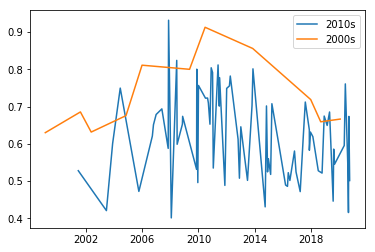

In [165]:
plt.plot(mean2010s.index, mean2010s['energy'])
plt.plot(mean2000s.index, mean2000s['energy'])

plt.legend(('2010s', '2000s'))


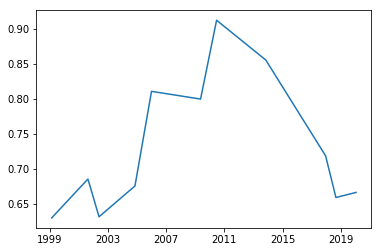

In [156]:
plt.plot(mean2000s.index, mean2000s['energy'])


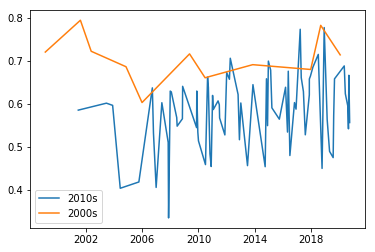

In [160]:
plt.plot(mean2010s.index, mean2010s['danceability'])
plt.plot(mean2000s.index, mean2000s['danceability'])
plt.legend(('2010s', '2000s'))

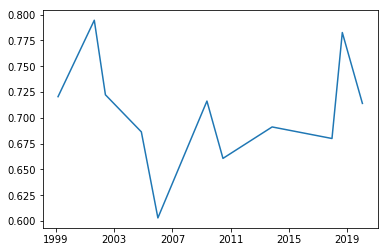

In [145]:
plt.plot(mean2000s.index, mean2000s['danceability'])

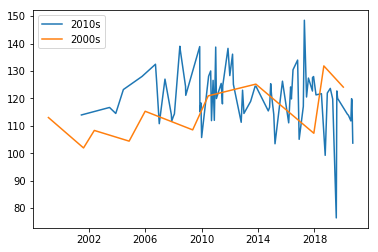

In [169]:
plt.plot(mean2010s.index, mean2010s['tempo'])
plt.plot(mean2000s.index, mean2000s['tempo'])
plt.legend(('2010s', '2000s'))

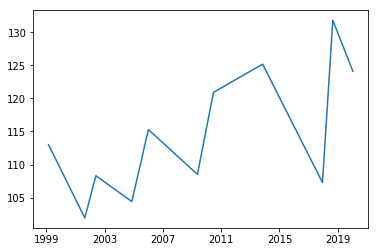

In [148]:
plt.plot(mean2000s.index, mean2000s['tempo'])


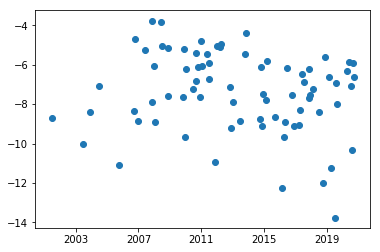

In [152]:
plt.scatter(mean2010s.index, mean2010s['loudness'])


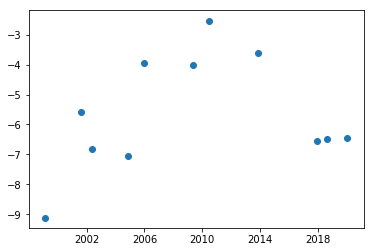

In [153]:
plt.scatter(mean2000s.index, mean2000s['loudness'])

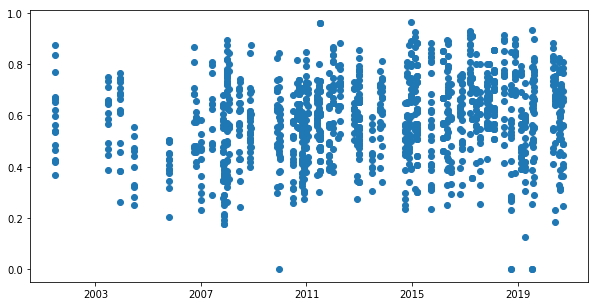

In [135]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot_date(x=joined2010s['release_date'], y=joined2010s['danceability'], marker='o')

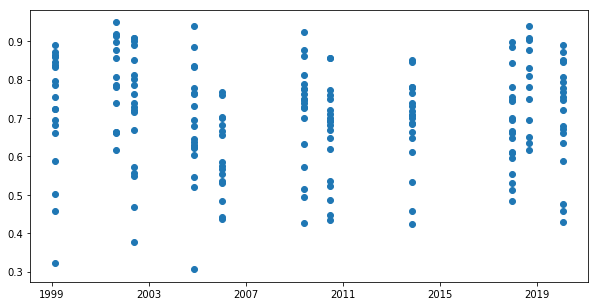

In [154]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot_date(x=joined2000s['release_date'], y=joined2000s['danceability'], marker='o')

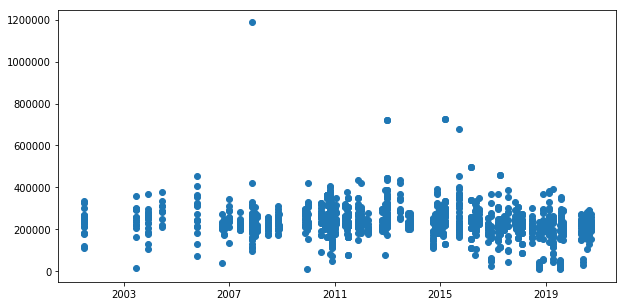

In [136]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot_date(x=joined2010s['release_date'], y=joined2010s['duration_ms'], marker='o')

In [ ]:
plt.scatter(mean2010s.index, mean2010s['loudness'])

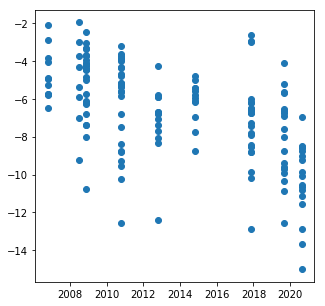

In [170]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot_date(x=dftaylor['release_date'], y=dftaylor['loudness'], marker='o')

### Questions

1. About how many research questions do we need?
2. Are we allowed to adjust our research questions throughout the course of our data collection/semester?
3. How should we give credit to the Kaggle dataset and to Spotify in our work?
4. Does our data set need to be larger?
